<a href="https://colab.research.google.com/github/jackysuenpython/Credit-Card-Fraud-Auto-Detection-Project-/blob/main/Credit_Card_Fraud_Auto_Detection_Project_using_ML_Logistic_Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Project: A Bank Client wants to develop a AI-driven model that can automatically detect credit card fraud , so the Bank can save money and time to check it manually
#Busienss Problem: It takes a large amount of time for bank employee to check credit card fraud. It cost the bank a lots of capital as they can not better relocate their human resouces
#Solution: Use Bank credit card historical data to develop a machine learning Logistic Regression model that can automatically detect when a fraud is found

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Import the dataset from google drive
ccdata = pd.read_csv('/content/drive/My Drive/creditcard.csv')

In [6]:
ccdata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
column_names = list(ccdata.columns)

# Print the column names
print(column_names)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [9]:
#missing value in the dataset
ccdata.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
ccdata['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
#separate the data
normal=ccdata[ccdata.Class==0]
fraud=ccdata[ccdata.Class==1]

In [12]:
normal.shape

(284315, 31)

In [13]:
fraud.shape

(492, 31)

In [14]:
#**Building new Normal dataset containing similar distribution of normal and fraud transactions**

In [15]:
normal_sample=normal.sample(n=492)

In [16]:
#Concatenating the two dataset
new_dataset=pd.concat([normal_sample,fraud],axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
159939,113045.0,0.008995,0.854598,0.308940,-0.575121,0.492061,-1.145891,1.022417,-0.236241,-0.126305,...,-0.248876,-0.526863,0.076227,0.054372,-0.468925,0.135837,0.248692,0.099749,4.47,0
164979,117123.0,2.060501,-0.131934,-1.084477,0.429631,-0.248828,-1.245778,0.108868,-0.271768,0.711137,...,-0.301496,-0.789625,0.354650,0.015537,-0.337683,0.199131,-0.078106,-0.062229,1.98,0
149061,90525.0,-7.996308,7.260932,-4.058003,-3.327043,0.551109,-1.224319,2.035584,-0.849717,8.272889,...,-1.288796,0.168252,0.043335,0.201593,1.437023,-0.038841,2.547259,0.633308,0.77,0
273519,165607.0,1.990044,-0.229019,-0.438836,0.103836,-0.322388,-0.220218,-0.478424,0.007717,0.926634,...,-0.085241,-0.082849,0.268911,-0.520987,-0.295433,-0.917846,0.062392,-0.039490,1.00,0
133228,80300.0,1.007471,-0.040200,0.356545,1.325423,-0.156052,0.165145,0.036221,0.123131,0.041288,...,-0.015668,0.015133,-0.125664,0.038684,0.607961,-0.336041,0.024127,0.015916,67.67,0


In [18]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 159939 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [19]:
new_dataset.shape

(984, 31)

In [20]:
#**Splitting the new_Dataset into X and Y**

In [21]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']
#separate X (independent features), Y (dependent feature)

In [22]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
159939,113045.0,0.008995,0.854598,0.308940,-0.575121,0.492061,-1.145891,1.022417,-0.236241,-0.126305,...,0.012016,-0.248876,-0.526863,0.076227,0.054372,-0.468925,0.135837,0.248692,0.099749,4.47
164979,117123.0,2.060501,-0.131934,-1.084477,0.429631,-0.248828,-1.245778,0.108868,-0.271768,0.711137,...,-0.296357,-0.301496,-0.789625,0.354650,0.015537,-0.337683,0.199131,-0.078106,-0.062229,1.98
149061,90525.0,-7.996308,7.260932,-4.058003,-3.327043,0.551109,-1.224319,2.035584,-0.849717,8.272889,...,4.916021,-1.288796,0.168252,0.043335,0.201593,1.437023,-0.038841,2.547259,0.633308,0.77
273519,165607.0,1.990044,-0.229019,-0.438836,0.103836,-0.322388,-0.220218,-0.478424,0.007717,0.926634,...,-0.147791,-0.085241,-0.082849,0.268911,-0.520987,-0.295433,-0.917846,0.062392,-0.039490,1.00
133228,80300.0,1.007471,-0.040200,0.356545,1.325423,-0.156052,0.165145,0.036221,0.123131,0.041288,...,-0.065492,-0.015668,0.015133,-0.125664,0.038684,0.607961,-0.336041,0.024127,0.015916,67.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [23]:
Y

159939    0
164979    0
149061    0
273519    0
133228    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

**Splitting the dataset into Training Data and Testing Data**


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
#80% training data, 20% test data

In [25]:
print(X_train,X_test,Y_train,Y_test)


            Time         V1         V2         V3        V4         V5  \
81734    59066.0  -1.031357   1.909367  -0.523362  1.585560   2.258591   
65534    51630.0  -3.408310   2.546435   0.204807 -2.211594  -0.326415   
56703    47545.0   1.176716   0.557091  -0.490800  0.756424   0.249192   
150684   93888.0 -10.040631   6.139183 -12.972972  7.740555  -8.684705   
6882      8808.0  -4.617217   1.695694  -3.114372  4.328199  -1.873257   
...          ...        ...        ...        ...       ...        ...   
39183    39729.0  -0.964567  -1.643541  -0.187727  1.158253  -2.458336   
191160  129141.0  -0.770082   0.270948  -0.593977  0.223976   2.077344   
143335   85285.0  -6.713407   3.921104  -9.746678  5.148263  -5.151563   
135027   81076.0  -0.274616   0.684722   1.043083  0.142333   1.264609   
17317    28625.0 -27.848181  15.598193 -28.923756  6.418442 -20.346228   

              V6         V7         V8        V9  ...       V20       V21  \
81734   4.705664  -1.228843  -2.24

**Model Training-Logistic Regression**

In [26]:
model=LogisticRegression()

In [27]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation- Accuracy Score**

In [28]:
y_predict=model.predict(X_test)

In [29]:
acc=accuracy_score(Y_test,y_predict)

In [30]:
acc
#93% accuracy rate!

0.9695431472081218

In [31]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(Y_test, y_predict)

# Print the confusion matrix
print(cm)

[[97  2]
 [ 4 94]]


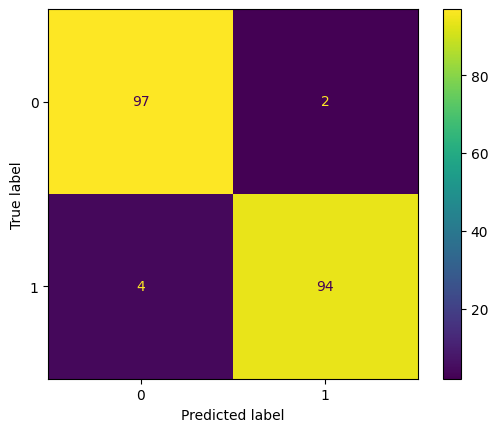

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have true labels (y_true) and predicted labels (y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, y_predict))
disp.plot()

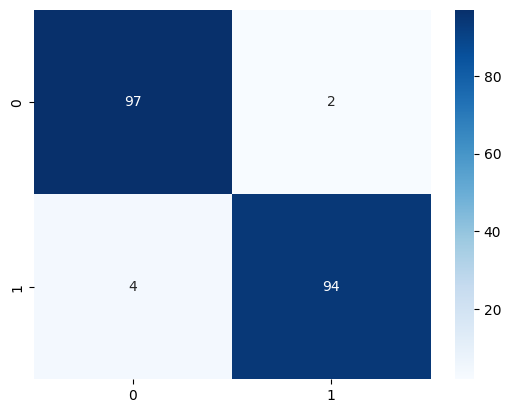

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(Y_test, y_predict)
cm_df = pd.DataFrame(cm, index=range(len(cm)), columns=range(len(cm)))
ax = sns.heatmap(cm_df, annot=True, cmap='Blues')  # Customize colormap as needed
plt.show()

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Calculate metrics
precision = precision_score(Y_test, y_predict)
recall = recall_score(Y_test, y_predict)
f1 = f1_score(Y_test, y_predict)
auc = roc_auc_score(Y_test, y_predict)
log_loss_value = log_loss(Y_test, y_predict)

# Print results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC:", auc)
print("Log Loss:", log_loss_value)


Precision: 0.9791666666666666
Recall: 0.9591836734693877
F1-Score: 0.9690721649484536
AUC: 0.9694908266336837
Log Loss: 1.097776245353822


In [39]:
# Make predictions
predictions = model.predict(X_test)

predictions

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

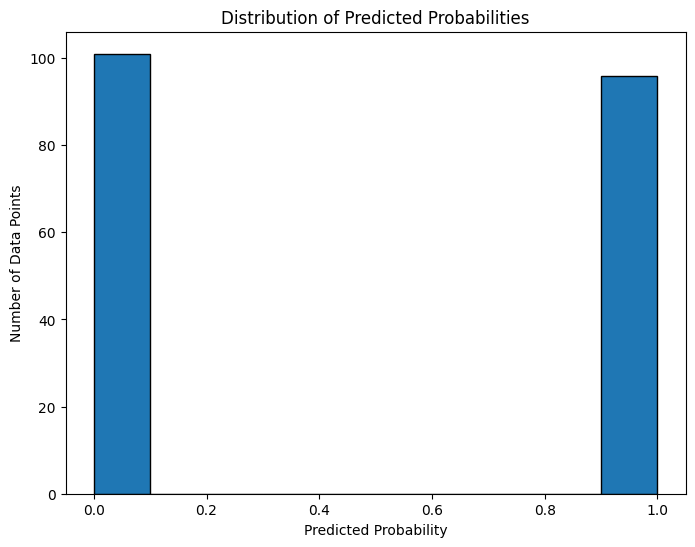

In [45]:
# Assuming you have predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(predictions, bins=10, edgecolor='black')
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Predicted Probabilities')
plt.show()


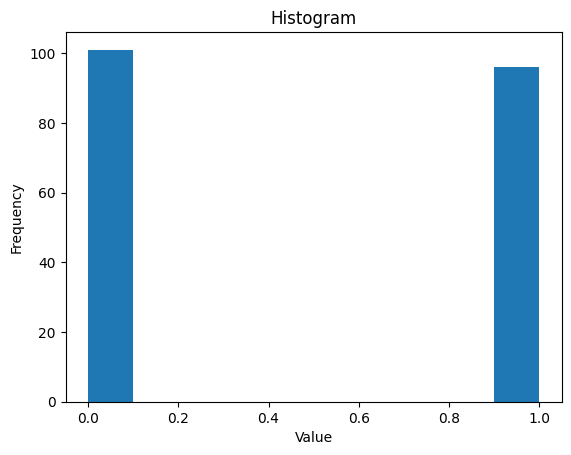

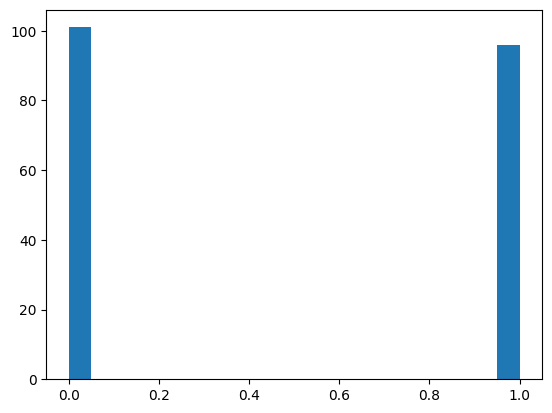

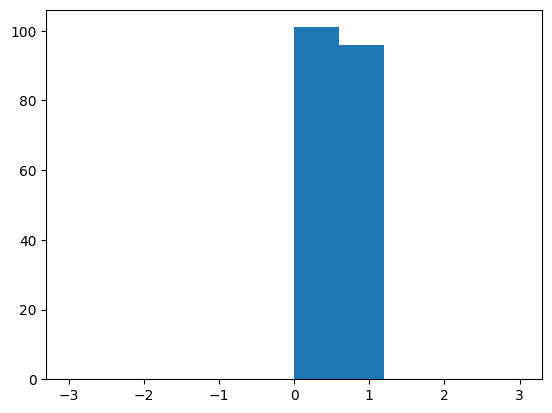

In [51]:
import matplotlib.pyplot as plt
import numpy as np


# Basic histogram
plt.hist(predictions)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

# Customizing number of bins
plt.hist(predictions, bins=20)  # 20 bins
plt.show()

# Setting bin edges manually
bin_edges = np.linspace(-3, 3, 11)  # 10 bins from -3 to 3
plt.hist(predictions, bins=bin_edges)
plt.show()




How to use the model?

Specific Steps for Predicting New Data:

Preprocess new transaction data: Ensure its format matches the training data's features and handling of missing values.
Run the model's predict method: Get the predicted probability of fraud.
Set a risk threshold: Based on the model's performance and risk tolerance, define a threshold to classify transactions as suspicious (e.g., 80% probability of fraud).
Combine with other signals: Use the prediction in conjunction with other fraud detection mechanisms, rules, and human expertise for a holistic assessment.
Alert, investigate, and react: Take appropriate actions based on the risk level, such as notifying the cardholder, seeking verification, or blocking the transaction.

In [79]:
def predict_new_data_point(model, new_data_point):
    """
    Predicts the class of a new data point using a trained logistic regression model.

    Args:
        model: A trained LogisticRegression model.
        new_data_point: A list or 1D NumPy array containing the features of the new data point.

    Returns:
        The predicted class (0 or 1) of the new data point.
    """

    # Make prediction
    prediction = model.predict(X_train)[25]

    return prediction
# Example usage (assuming you have trained your model already)
if __name__ == "__main__":
    prediction = predict_new_data_point(model, new_data_point)
    print("Predicted class:", prediction)  # 0 or 1


Predicted class: 1
